# [2] Data Handling and Preparation

In [1]:
# 기본 라이브러리 로딩 및 사용자 정의함수 정의

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 

import warnings
warnings.filterwarnings('ignore')


# define universally useful UDFs

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'


# matplotlib 에서 한글을 표시하기 위한 설정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name) # 한글 표시 가능하도록 폰트 지정 
matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록

### The dataset: A Virtual Customer Transaction Summary 

about Customer Transaction Summary dataset
- 가상적인 신용카드사 또는 종합쇼핑몰 의 거래내역을 기초 집계해서 생성한 데이터 (가정)
- 카테고리들을 자신의 업종에 대입한다면 (상품군 - 예: 보험이라면 장기, 단기, 종합 등)

In [81]:
# mostly young, female customers

print(dataPath)
dfc20 = pd.read_csv(dataPath + 'dfc20bs.csv')
print(dfc20.columns)
list_feat = ['custid','age','amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login',
             'amt_nxtyr', 'cnt_nxtyr']

dfc21 = dfc20[list_feat]
print(dfc21.shape)
dfc21.head()

https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/
Index(['Unnamed: 0', 'custid', 'age', 'sex', 'marital', 'area', 'education',
       'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl',
       'amt_prmmsneakers', 'amt_food', 'amt_beauty', 'cnt_pstyr', 'amt_pstyr',
       'cnt_login', 'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
(6000, 13)


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3
3,4,27,0,0,0,0,0,0,0,2,10,387005,8
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10


(6000, 21)


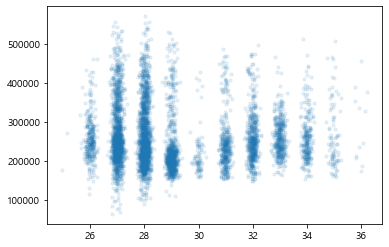

In [5]:
print(dfc20.shape)
plt.scatter(rjitt(dfc20.age), dfc20.amt_pstyr, alpha=0.1, s=10)

In [6]:
print('Column Descriptions\n=======================')
print(dfc21.columns)
print(['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액','프리미엄스니커즈구매액','구매건수','로그인건수','다음해구매금액','다음해구매건수'])

Column Descriptions
Index(['custid', 'age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login',
       'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액', '프리미엄스니커즈구매액', '구매건수', '로그인건수', '다음해구매금액', '다음해구매건수']


### Understanding Data Structure

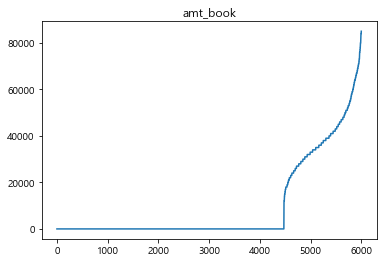

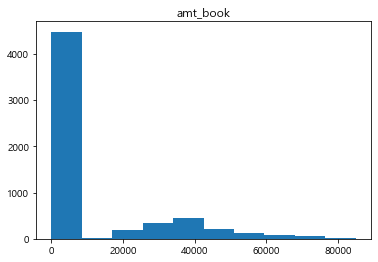

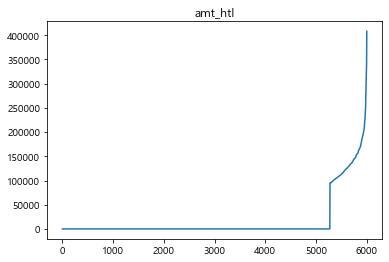

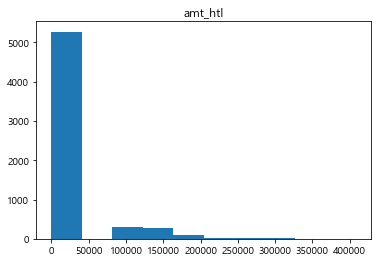

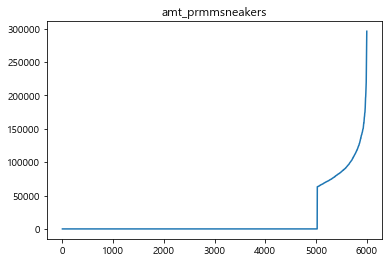

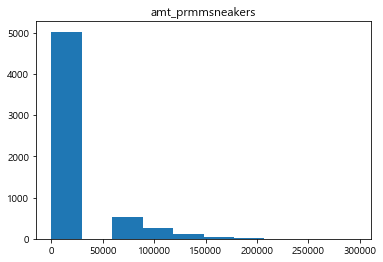

In [7]:
# Check Distributions

feats = ['amt_book', 'amt_htl', 'amt_prmmsneakers']
for x in feats:
    plt.plot(dfc21.index, dfc21[x].sort_values())
    plt.title(x)
    plt.show()
    
    plt.hist(dfc21[x])
    plt.title(x)
    plt.show()

# not all customer buys in every category

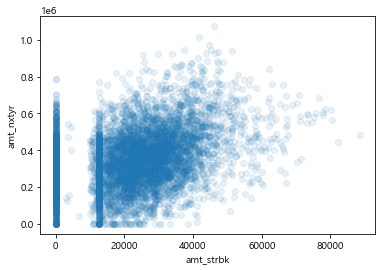

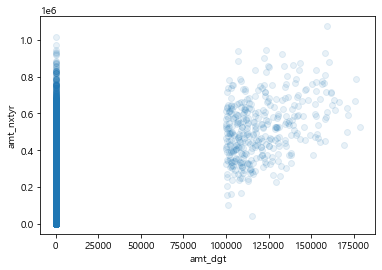

In [8]:
# relationships between variables

plt.scatter(dfc21.amt_strbk, dfc21.amt_nxtyr, alpha=0.1)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nxtyr')
plt.show()

plt.scatter(dfc21.amt_dgt, dfc21.amt_nxtyr, alpha=0.1)
plt.xlabel('amt_dgt')
plt.ylabel('amt_nxtyr')
plt.show()

age  :  -0.0392
amt_nike  :  0.1255
amt_hnm  :  0.0424
amt_strbk  :  0.3592
amt_dgt  :  0.2785
amt_book  :  0.3037
amt_htl  :  -0.0143
amt_prmmsneakers  :  0.0174
cnt_pstyr  :  0.1503
cnt_login  :  -0.0668


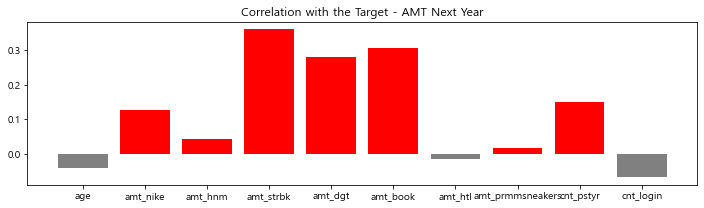

age  :  -0.0041
amt_nike  :  0.0502
amt_hnm  :  0.0547
amt_strbk  :  0.1146
amt_dgt  :  0.017
amt_book  :  -0.0209
amt_htl  :  0.022
amt_prmmsneakers  :  0.0254
cnt_pstyr  :  0.08
cnt_login  :  -0.0479


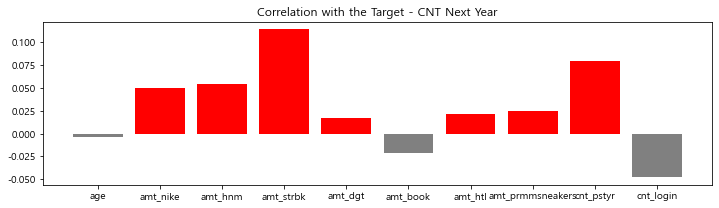

In [9]:
featlist = ['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
            'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']


# 결과를 저장할 배열을 미리 생성
corrvals = np.repeat(0.00, len(featlist))
# 지표 리스트 생성
indicators = ['hr','obp','slg', 'ops']

# list and index 동시에 필요
for i in range(len(featlist)):
    corrvals[i] = round(np.corrcoef(dfc21.amt_nxtyr, dfc21[featlist[i]])[0,1],4)
    print(featlist[i], ' : ', corrvals[i])


# plotting correlations
colors1 = ['red' if x>0 else 'grey' for x in corrvals]
plt.figure(figsize=(12,3))    
plt.bar(featlist,corrvals, color=colors1)
plt.title('Correlation with the Target - AMT Next Year')
plt.show()


# list and index 동시에 필요
for i in range(len(featlist)):
    corrvals[i] = round(np.corrcoef(dfc21.cnt_nxtyr, dfc21[featlist[i]])[0,1],4)
    print(featlist[i], ' : ', corrvals[i])


# plotting correlations
colors1 = ['red' if x>0 else 'grey' for x in corrvals]
plt.figure(figsize=(12,3))    
plt.bar(featlist,corrvals, color=colors1)
plt.title('Correlation with the Target - CNT Next Year')
plt.show()

### 파생변수 생성 get derived features

In [12]:
# category 중에서 몇개나 구매했는가

featlist = ['amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
            'amt_book', 'amt_htl', 'amt_prmmsneakers']

# print(dfc21.columns)
featlist1 = ['custid'] + featlist

# wide format을 long format으로 변환
dfc21_01 = pd.melt(dfc21[featlist1], id_vars='custid', value_vars=featlist)

display(dfc21_01.head())
# 값이 0 보다 큰 레코드만 고른 후 중복을 제거
dfc21_01 = dfc21_01[dfc21_01.value>0][['custid', 'variable']].drop_duplicates()
# 카테고리 수를 산출
dfc21_02 = dfc21_01.groupby('custid').count().reset_index()
dfc21_02.columns = ['custid', 'cnt_cat']
display(dfc21_02.head())

dfc21 = dfc21.merge(dfc21_02, on='custid', how='left')
dfc21.head()

,custid,variable,value
0,1,amt_nike,25100
1,2,amt_nike,21500
2,3,amt_nike,0
3,4,amt_nike,0
4,5,amt_nike,20100


,custid,cnt_cat
0,1,2
1,2,2
2,3,1
3,5,3
4,6,2


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr,cnt_cat_x,cnt_cat_y,cnt_cat
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3,2.0,2.0,2.0
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8,2.0,2.0,2.0
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3,1.0,1.0,1.0
3,4,27,0,0,0,0,0,0,0,2,10,387005,8,NaN,NaN,NaN
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10,3.0,3.0,3.0


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr,cnt_cat_x,cnt_cat_y,cnt_cat
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3,2.0,2.0,2.0
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8,2.0,2.0,2.0
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3,1.0,1.0,1.0
3,4,27,0,0,0,0,0,0,0,2,10,387005,8,NaN,NaN,0.0
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10,3.0,3.0,3.0


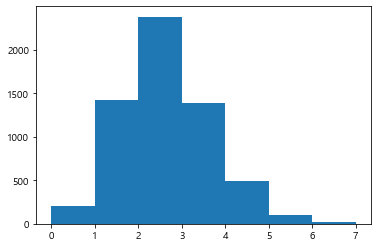

In [13]:
# left join으로 발생된 missing value를 0으로 변경

dfc21['cnt_cat'] = np.where(dfc21['cnt_cat'].isna(), 0, dfc21['cnt_cat'])
display(dfc21.head())

bins = len(dfc21.cnt_cat.unique())-1
plt.hist(dfc21.cnt_cat, bins=bins);

In [14]:
# target variables 와 관계 확인

# 금액과의 상관성이 더 높음

print(np.corrcoef(dfc21.amt_nxtyr, dfc21.cnt_cat)[0,1], 
      np.corrcoef(dfc21.cnt_nxtyr, dfc21.cnt_cat)[0,1])

0.20561477001549075 0.0766150768998433


In [15]:
# 변수간 관계를 활용한 파생변수 생성
# 변수 .... 입력변수, 독립변수 ,predictor, feature, input

# 먼저 상관관계 확인
corrcats = dfc21[featlist].corr()
corrcats 

,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers
amt_nike,1.000000,-0.001563,0.027709,0.128844,0.148248,-0.009355,0.011902
amt_hnm,-0.001563,1.000000,0.027295,0.026095,0.029349,0.034720,0.013687
amt_strbk,0.027709,0.027295,1.000000,0.228538,0.252120,0.028274,0.014532
amt_dgt,0.128844,0.026095,0.228538,1.000000,0.634559,0.016414,0.005772
amt_book,0.148248,0.029349,0.252120,0.634559,1.000000,0.016626,-0.028192
amt_htl,-0.009355,0.034720,0.028274,0.016414,0.016626,1.000000,0.012983
amt_prmmsneakers,0.011902,0.013687,0.014532,0.005772,-0.028192,0.012983,1.000000


In [20]:
# wide format을 long format으로 변경
corrcats1 = pd.melt(corrcats.reset_index(), id_vars='index', value_vars=featlist)
corrcats1 = corrcats1[(corrcats1.value >0.2) & (corrcats1.value <1)]
corrcats1.sort_values('value', ascending=False)

,index,variable,value
25,amt_book,amt_dgt,0.634559
31,amt_dgt,amt_book,0.634559
18,amt_book,amt_strbk,0.252120
30,amt_strbk,amt_book,0.252120
17,amt_dgt,amt_strbk,0.228538
23,amt_strbk,amt_dgt,0.228538


<AxesSubplot:>

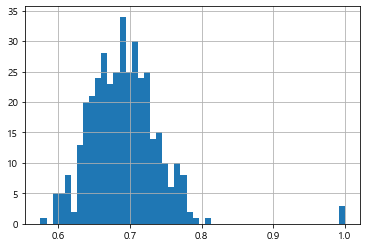

In [22]:
# book과 dgt 간에 높은 상관관계가 존재함은 알았고
# 두 품목 중 더 많은 금액이 어느 쪽인지를 보여주는 파생변수 생성

# 합계중 디지털이 차지하는 비중을 비율화
dfc21['dgt_bk_ratio'] = dfc21.amt_dgt / (dfc21.amt_book + dfc21.amt_dgt +1)

# 둘 다 구매하지 않은 고객은 제외하고 분포 확인
dfc21['dgt_bk_ratio'][dfc21['dgt_bk_ratio']>0].hist(bins=50)

In [23]:
# 금액과의 상관성이 더 높음

print(np.corrcoef(dfc21.amt_nxtyr, dfc21.dgt_bk_ratio)[0,1], 
      np.corrcoef(dfc21.cnt_nxtyr, dfc21.dgt_bk_ratio)[0,1])

0.26016449474030134 0.019056481913686224


In [24]:
# alternatively
dfc21[['amt_nxtyr','cnt_nxtyr', 'dgt_bk_ratio']].corr()

,amt_nxtyr,cnt_nxtyr,dgt_bk_ratio
amt_nxtyr,1.000000,0.099276,0.260164
cnt_nxtyr,0.099276,1.000000,0.019056
dgt_bk_ratio,0.260164,0.019056,1.000000


--> 다양한 파생변수를 생성해서 후보로의 가능성을 확인한 후 유용해 보이는 변수는 생성된 파생 데이터를 데이터셋에 추가

### [연습문제]
- 연령과 서적구매액간의 관계를 scatter 로 확인하라 - jitter 활용
- 서적구매액/연령 비율의 histogram을 작성하라
- histogram에 중위수를 보조선으로 표시하라
- histogram에 중위수를 서적을 구매한 사람들 중에서만의 중위수 값을 구해서 보조선으로 표시하라


그리고 참고로 ~~~~ EDA 부분의 노트북 파일 세개는 점심시간에 github 다시 저장을 해뒀습니다. (수업중 추가한 커멘트 등을 포함해서요)

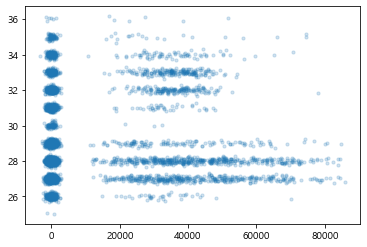

In [39]:
plt.scatter(rjitt(dfc21.amt_book), rjitt(dfc21.age), alpha=0.2, s=10)

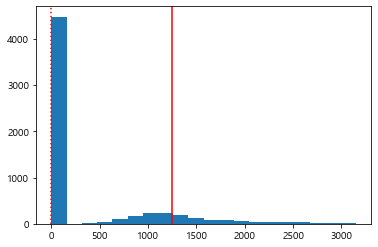

In [43]:
plt.hist(dfc21.amt_book/dfc21.age, bins=20)
plt.axvline((dfc21.amt_book/dfc21.age).median(), 
            color='red', linestyle=':')

dfc211 = dfc21[dfc21.amt_book>0]
plt.axvline((dfc211.amt_book/dfc211.age).median(), color='red')

### 결측치 처리 - missing value handling

In [16]:
# 구조 확인 및 결측치 존재 여부 확인

print('shape of dataset ', dfc21.shape)
print('how many missing? ', dfc21.isna().any().sum())

shape of dataset  (6000, 15)
how many missing?  0


In [56]:
tmp_amt_book = dfc21.amt_book[2000] # 복구를 위해 임시로 복사해두고
tmp_amt_book
# tmp_amt_book = 31000
dfc21.amt_book[2000] = np.nan # 강제로 missing value 생성
# dfc21.amt_book[2000] = tmp_amt_book # 복구에 사용

print(dfc21.amt_book[2000])
print('how many missing? ', dfc21.isna().any().sum())

nan
how many missing?  1


In [58]:
# 어느 컬럼에 missing?
print(dfc21.isna().any())

# missing value 처리
# 평균으로 대체 replacement

dfc21['amt_book'] = [dfc21.amt_book.mean() if pd.isna(x) else x for x in dfc21.amt_book]

# 다시 missing 여부 체크
print(dfc21.isna().any().sum(), ' *')
print(dfc21.amt_book[2000], ' ** ', dfc21.amt_book.mean())

custid              False
age                 False
amt_nike            False
amt_hnm             False
amt_strbk           False
amt_dgt             False
amt_book            False
amt_htl             False
amt_prmmsneakers    False
cnt_pstyr           False
cnt_login           False
amt_nxtyr           False
cnt_nxtyr           False
cnt_cat             False
dgt_bk_ratio        False
dtype: bool
0  *
10069.344890815137  **  10069.344890815137


In [54]:
# dfc21 = dfc21.drop(['cnt_cat_x', 'cnt_cat_y'], axis=1) # 컬럼명으로 해당 컬럼을 삭제

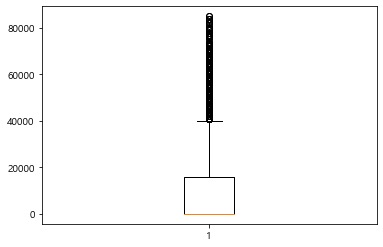

In [59]:
plt.boxplot(dfc21.amt_book);

### 아웃라이어 확인 및 처리 outlier detection and handling

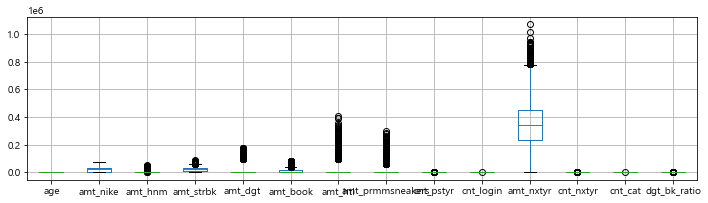

In [60]:
plt.figure(figsize=(12,3))
dfc21[dfc21.columns[1::]].boxplot(); # 2번째 부터 전체 컬럼들 리스트

Index(['age', 'amt_nike', 'amt_hnm'], dtype='object')


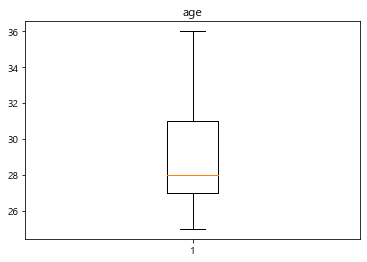

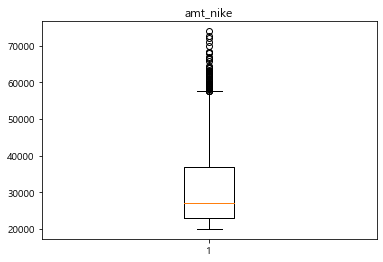

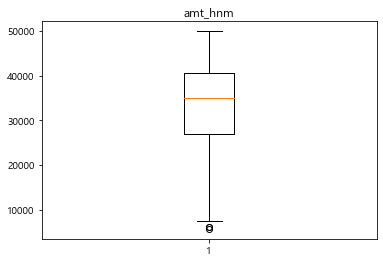

In [67]:
# 연속으로 박스플롯 출력 - 아웃라이어 존재 여부 확인

# for x in dfc21.columns[1::]:
print(dfc21.columns[1:4])
for x in dfc21.columns[1:4]:
    # 0보다 큰 값들만에 대한 박스플롯
    plt.boxplot(dfc21[dfc21[x]>0][x])
    # 아래줄은 원래 스크립트
    # plt.boxplot(dfc21[x])
    plt.title(x)
    plt.show()    

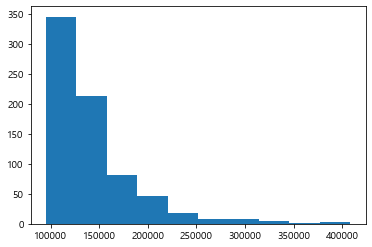

In [68]:
# 호텔 이용금액 분포 확인
plt.hist(dfc21.amt_htl[dfc21.amt_htl>0]);

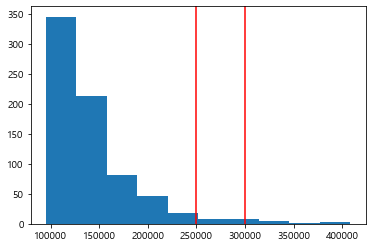

In [69]:
# 아웃라이어 판정 기준점 설정

plt.hist(dfc21.amt_htl[dfc21.amt_htl>0])
plt.axvline(250000, color='red')
plt.axvline(300000, color='red')

# 기준을 설정할 방법?
# [1] 직관적으로 == 내마음대로
# [2] 백분율 적용 (예: 상위 0.1%)
# [3] 박스플롯이 아웃라이어로 본 것들
# [4] six sigma의 원리를 활용 

In [24]:
# 아웃라이어 값의 대체

# 예: 30만원 이상인 경우는 비정상적인 경우라고 가정하면 30만원으로 대체

# dfc21['amt_htl'] = np.where(dfc21['amt_htl']>300000, 300000, dfc21['amt_htl'])

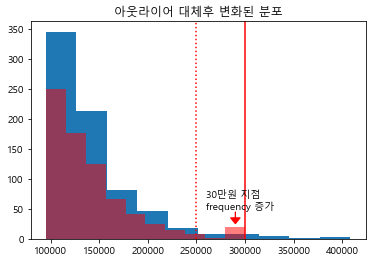

In [70]:
adj_amt_htl = np.where(dfc21['amt_htl']>300000, 300000, dfc21['amt_htl'])

plt.hist(dfc21.amt_htl[dfc21.amt_htl>0])
plt.hist(adj_amt_htl[adj_amt_htl>0], color='red', alpha=0.5)
plt.axvline(250000, color='red', linestyle='dotted')
plt.axvline(300000, color='red')

plt.text(260000, 50, '30만원 지점\nfrequency 증가')
plt.arrow(290000,50-5, 0,-20, length_includes_head=True,
          head_width=10000, head_length=10, 
          color='red')
plt.title('아웃라이어 대체후 변화된 분포')
plt.show()

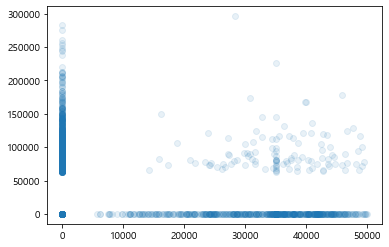

In [74]:
# 챠트 작성에서도 (=시각화에서도) 극단값이 포함되면 전체 공간을 비효율적으로 사용하게 될 수가 있으니
# 극단값 대체후 시각화도 고려가능
plt.scatter(dfc21.amt_hnm, dfc21.amt_prmmsneakers, alpha=0.1)

[연습문제]
- 스타벅스 이용금액에서 아웃라이어를 설정하고 대체한 후 분포를 확인하라
- 기준에 따라 대체된 고객은 몇명인가?

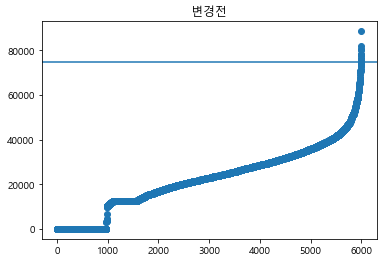

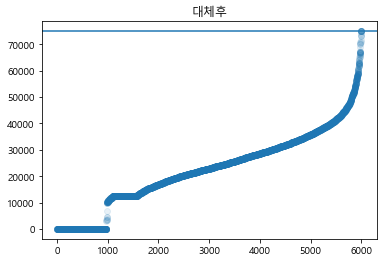

In [86]:
plt.scatter(dfc21.index, dfc21.amt_strbk.sort_values())
plt.axhline(75000)
plt.title('변경전')
plt.show()
# 자 이제 아웃라이어는 75000원 초과임 (내마음대로 설정한 기준)
# 대체 : 75000원 초과를 75000원으로 변경

dfc2101 = dfc21.copy()
# 대상자는 ... 
# dfc2101[dfc2101.amt_strbk>75000]

dfc2101['amt_strbk'] = np.where(dfc2101.amt_strbk>75000, 75000, dfc2101.amt_strbk )
plt.scatter(dfc2101.index, dfc2101.amt_strbk.sort_values(), alpha=0.1)
plt.title('대체후')
plt.axhline(75000)
plt.show()

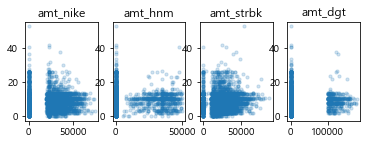

In [26]:
# 한 눈에 여러 챠트를 확인하기 위해 옆으로 출력

plt.figure(1)
for i in range(1,5):
    ax = plt.subplot(240+i)
    plt.scatter(dfc21[dfc21.columns[1::][i]], dfc21.cnt_nxtyr,
               s=10, alpha=0.2)
    plt.title(dfc21.columns[1::][i])
plt.show()